Testing on some 

In [3]:
import os
import tarfile
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
from NeuralNMF import train
from sklearn.feature_extraction.text import TfidfVectorizer
from NeuralNMF import Neural_NMF
import pickle
import scipy.io


mat_data = scipy.io.loadmat(r"C:\Users\ASUS\Downloads\For_Tezuka\For_Tezuka\Opto_Data_CLa13.mat")

In [4]:
train__ = mat_data["C"][0][0]

train__ = torch.tensor(train__)

In [5]:
test__ = mat_data["C"][0][1]
test__ = torch.tensor(test__)

In [7]:
opto = mat_data["opt"][0][0]

In [8]:
m, k1, k2 = 101, 50, 10
net = Neural_NMF([m, k1, k2])

In [9]:
history = train(net, train__, epoch=10, lr=500, supervised=False)

100%|██████████| 10/10 [00:54<00:00,  5.40s/it]


In [11]:
history[1][1].shape

torch.Size([10, 5957])

In [12]:
A = history[0][1]
S = history[1][1]

In [14]:
a = history[0][0]
a.shape

torch.Size([101, 50])

In [20]:
A1 = A.detach().numpy()
S1 = S.detach().numpy()

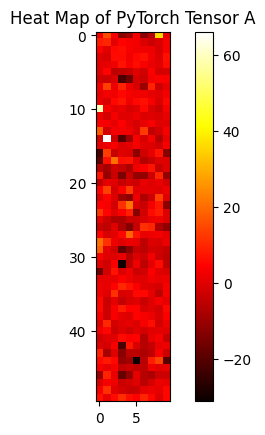

In [17]:
plt.imshow(A1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

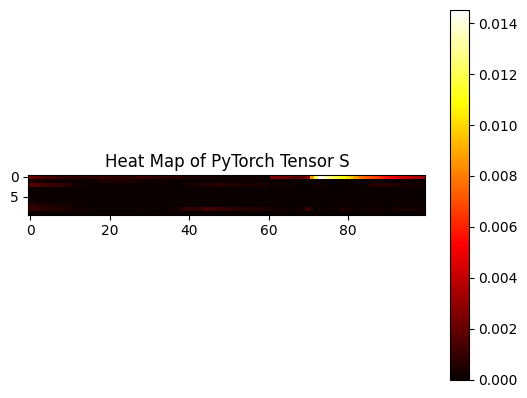

In [18]:
plt.imshow(S1[:,100:200], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [21]:
import numpy as np
opto = np.array(opto)

In [22]:
count_ones = np.count_nonzero(opto == 1)
count_ones

95

In [23]:
indices = np.where(opto == 1)[1]

In [24]:
slices = []
for idx in indices:
    # Ensure we do not go out of bounds
    if idx + 10 <= S1.shape[1]:
        slices.append(S1[:, idx:idx+10])
    else:
        slices.append(S1[:, idx:])
        

In [25]:
C = np.hstack(slices) if slices else np.array([])

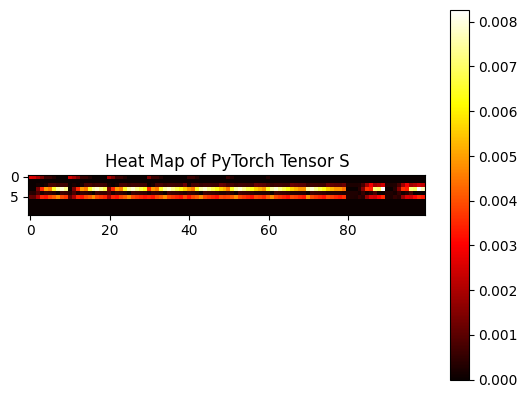

In [26]:
plt.imshow(C[:,100:200], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [38]:
Ex = test__[:, indices[0]:indices[0]+50]

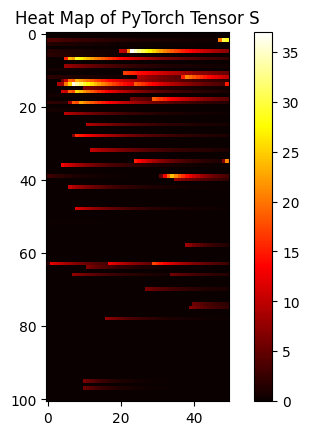

In [52]:
plt.imshow(Ex, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [18]:
a.shape

torch.Size([101, 50])

In [41]:
a = a.detach().numpy()

In [32]:
Ex.shape

(50, 0)

In [47]:
a = torch.tensor(a)

In [48]:
B = a*Ex 

In [49]:
B.shape

torch.Size([101, 50])